# CREDIT CARD FRAUD DETECTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd


'C:\\Users\\admin\\credit card project\\Credit Card Fraud'

In [3]:
df = pd.read_csv('./data/creditcard.csv')

In [4]:
df2=df.copy()

In [6]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
len(df)

284807

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
len(df[df['Class']==1])  ## There are 492  frauds in this dataset

492

In [12]:
fraud_pct = round(len(df[df['Class']==1])/len(df)*100,2)
nofraud_pct = round(len(df[df['Class']==0])/len(df)*100,2)

print("Fraud transactions are    : ",str(fraud_pct) +"% of the  dataset. ")
print("No fraud transactions are : ",str(nofraud_pct) +"% of the dataset. ")

Fraud transactions are    :  0.17% of the  dataset. 
No fraud transactions are :  99.83% of the dataset. 


## Univariate Analysis

Text(0.5, 1.0, ' 0: Non-Fraud     1: Fraud')

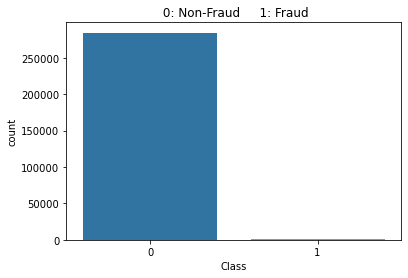

In [13]:
sns.countplot(x = "Class",data = df)
plt.title(" 0: Non-Fraud     1: Fraud")

Text(0.5, 1.0, 'Distribution of Amount')

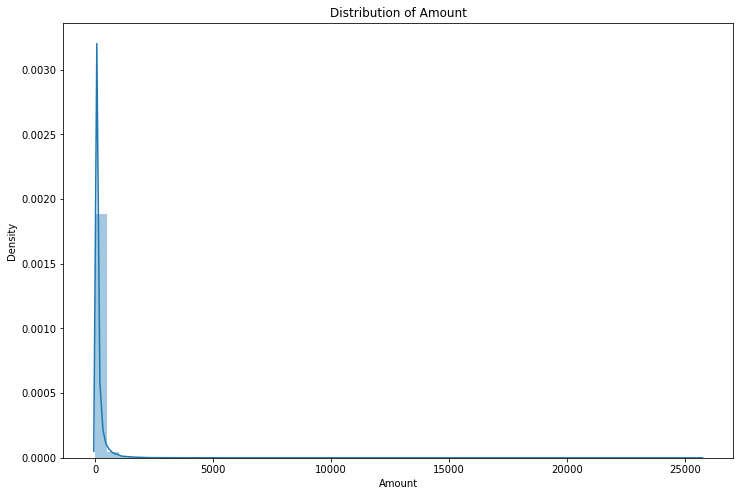

In [14]:
plt.figure(figsize = (12,8))
sns.distplot(df['Amount'])
plt.title("Distribution of Amount")


Text(0.5, 1.0, ' Distribution of transaction time')

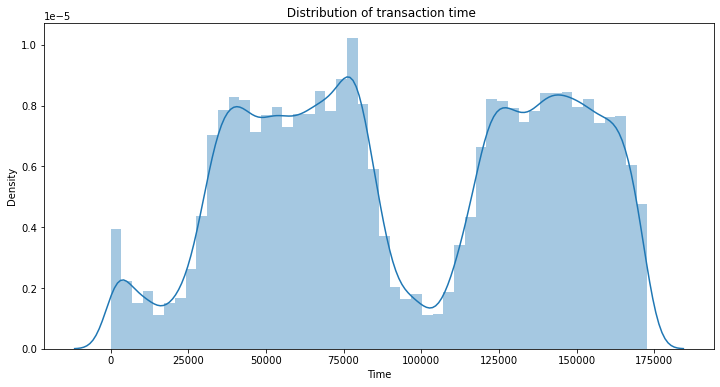

In [15]:
plt.figure(figsize=(12,6))
sns.distplot(df['Time'],kde = True)
plt.title(" Distribution of transaction time")

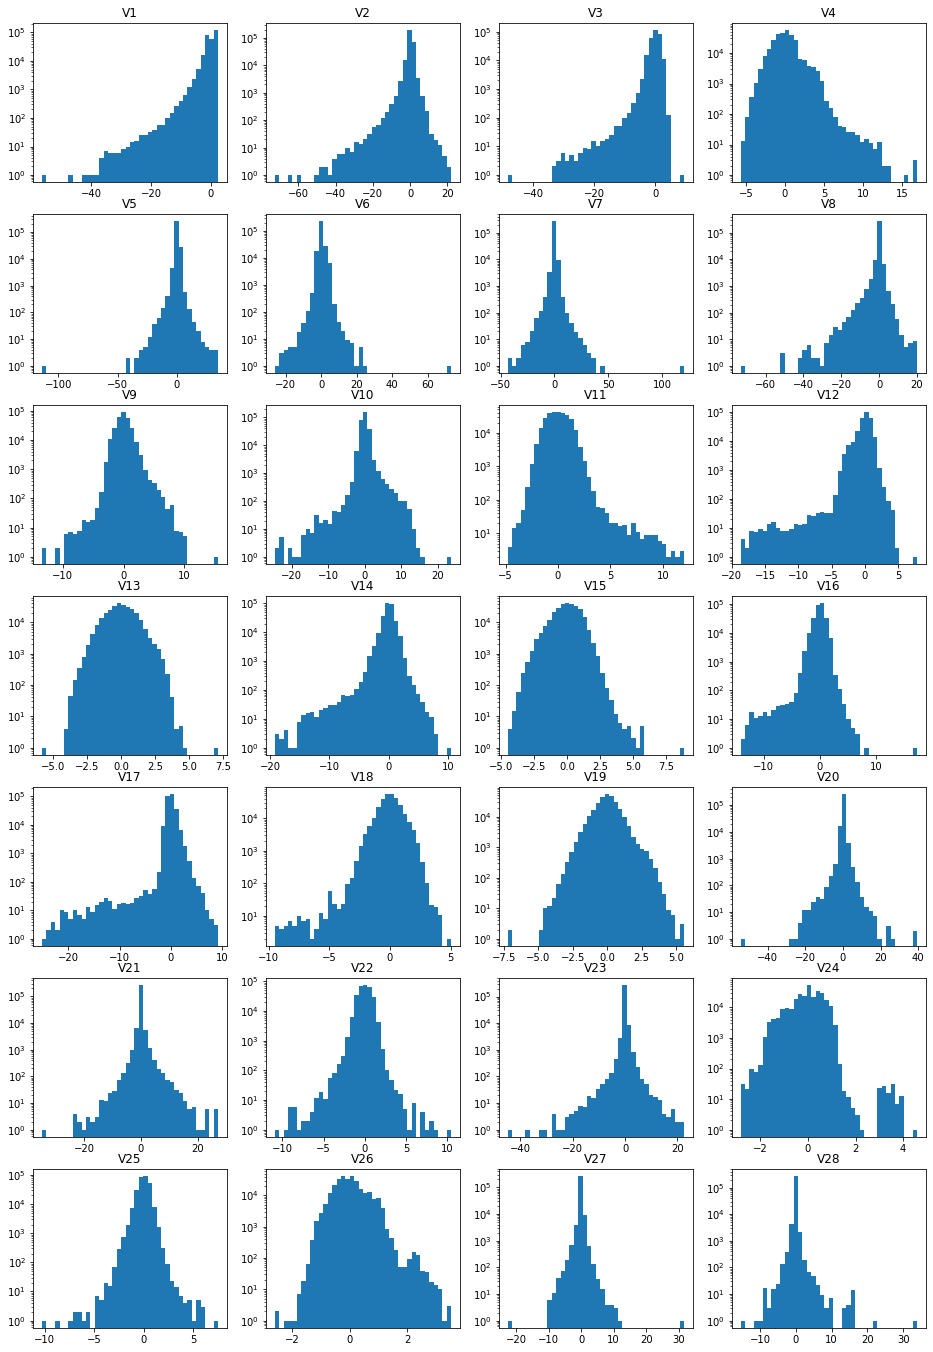

In [16]:
fig, ax = plt.subplots(nrows=7, ncols=4, figsize = (16,24))

for i in range(1,29):
    
    m=(i-1)//4
    n=(i-1)%4
    col = 'V'+str(i)
    ax[m,n].hist(df[col],bins=40)
    ax[m,n].set_title(col)
    ax[m,n].set_yscale('log')
    

## Bivariate Analysis

Text(0.5, 1.0, 'Amount vs Class')

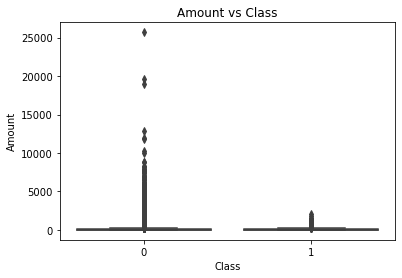

In [16]:
#class vs amount

sns.boxplot(x = 'Class',y = 'Amount',data = df)
# plt.ylim(0,1000)
plt.title("Amount vs Class")

In [17]:
df[df['Amount']>10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [18]:
df = df[df['Amount']<10000]
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,...,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000,284799.000000
mean,94813.586235,0.000716,0.001123,0.000542,-0.000326,0.000800,-0.000436,-0.000897,0.000198,0.000045,...,-0.000100,0.000140,0.000326,-0.000027,0.000103,0.000019,-0.000073,0.000008,87.927043,0.001728
std,47488.019368,1.953489,1.635632,1.511555,1.414375,1.359939,1.324170,1.210706,1.193066,1.098578,...,0.732325,0.724703,0.618721,0.605586,0.520394,0.482084,0.399034,0.328549,235.414278,0.041528
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-8.887017,-44.807735,-2.836627,-10.295397,-2.068561,-22.565679,-11.710896,0.000000,0.000000
25%,54202.500000,-0.920290,-0.598457,-0.890240,-0.848660,-0.691546,-0.768299,-0.554089,-0.208605,-0.643083,...,-0.228395,-0.542320,-0.161841,-0.354593,-0.317128,-0.326979,-0.070835,-0.052960,5.590000,0.000000
50%,84691.000000,0.018158,0.065524,0.179859,-0.019921,-0.054322,-0.274227,0.040079,0.022363,-0.051416,...,-0.029452,0.006795,-0.011191,0.040964,0.016607,-0.052124,0.001343,0.011243,22.000000,0.000000
75%,139320.000000,1.315648,0.803743,1.027212,0.743302,0.611927,0.398463,0.570385,0.327356,0.597164,...,0.186367,0.528554,0.147642,0.439524,0.350716,0.240952,0.091045,0.078277,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.491217,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,8790.260000,1.000000


Text(0.5, 1.0, 'Amount vs Class')

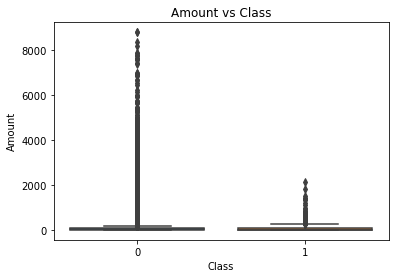

In [19]:
sns.boxplot(x = 'Class',y = 'Amount',data = df)
plt.title("Amount vs Class")

In [20]:
#AMOUNT VS TIME Distribution

data_new = df
timedelta = pd.to_timedelta(data_new['Time'],unit = 's')

data_new['Time_min'] = (timedelta.dt.components.minutes).astype(int)
data_new['Time_hour']= (timedelta.dt.components.hours).astype(int)

In [25]:
data_new['Time_hour'].tail(61)

284746    23
284747    23
284748    23
284749    23
284750    23
          ..
284802    23
284803    23
284804    23
284805    23
284806    23
Name: Time_hour, Length: 61, dtype: int32

Text(0.5, 1.0, 'Amount by Minutes of Frauds and Normal Transactions')

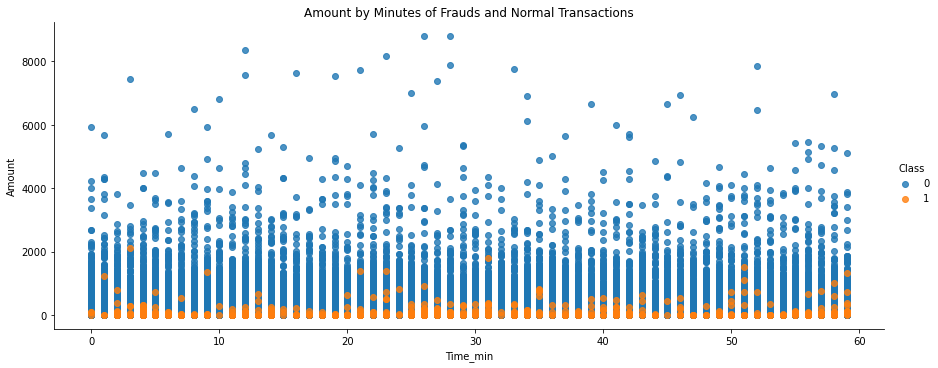

In [22]:
ax = sns.lmplot(y = 'Amount', x='Time_min',fit_reg=False, aspect = 2.5, data = data_new, hue='Class')
plt.title("Amount by Minutes of Frauds and Normal Transactions")

Text(0.5, 1.0, 'Amount by hours of Frauds and Normal Transactions')

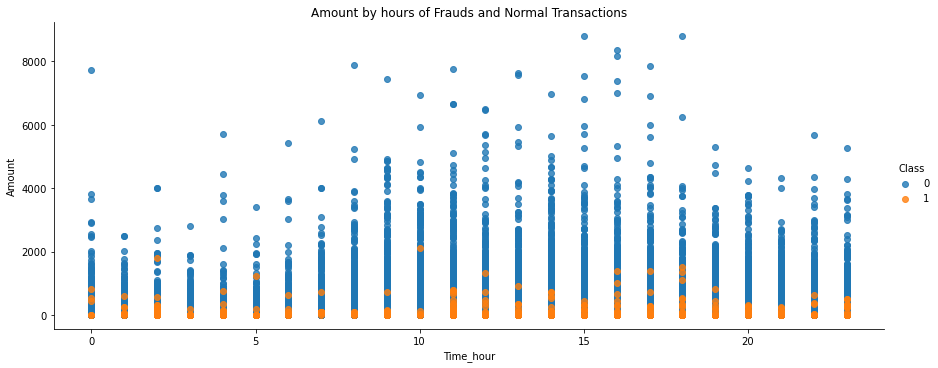

In [23]:
ax = sns.lmplot(y = 'Amount',x = 'Time_hour',fit_reg=False, aspect = 2.5,data = data_new, hue = 'Class')
plt.title("Amount by hours of Frauds and Normal Transactions")

In [24]:
# THIS SHOWS THAT THERE IS NOT PARTICULAR TIME WHEN FRAUDS ARE 
#PREVALENT DURING THE DAY. THEY WORK HARD BOTH DURING THE DAY AND THE NIGHT

(-1.0, 25.0)

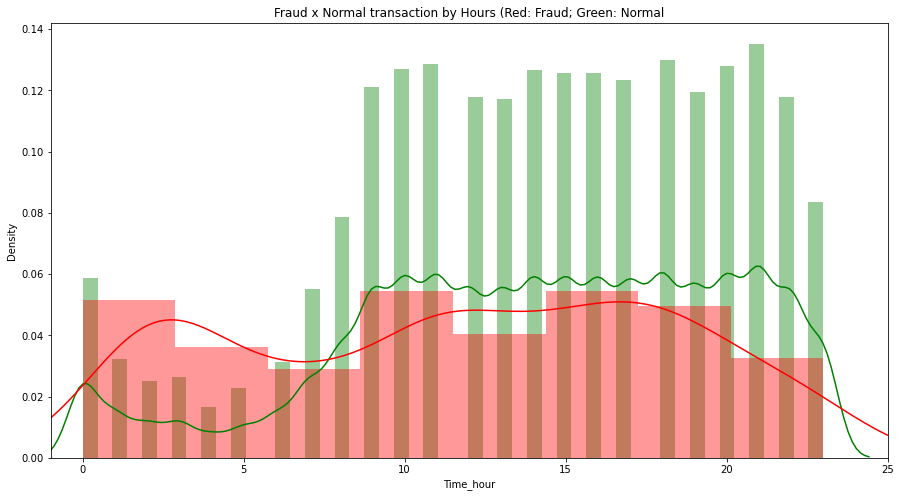

In [25]:
plt.figure(figsize=(15,8))
sns.distplot(data_new[data_new['Class']==0]['Time_hour'],color='g')
sns.distplot(data_new[data_new['Class']==1]['Time_hour'],color='r')
plt.title('Fraud x Normal transaction by Hours (Red: Fraud; Green: Normal',fontsize=12)
plt.xlim([-1,25])

In [26]:
#data_new[(data_new['Class']==1) & (data_new['Amount']>500)]

## DATA Preprocessing

In [27]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis = 1, inplace = True)

In [28]:
df.drop(['Time_min','Time_hour'],axis = 1, inplace=True)

In [29]:
scaled_amount = df['scaled_amount']
df.drop(['scaled_amount'],axis=1,inplace=True)

df.insert(0,'scaled_amount',scaled_amount)

df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## Splitting data using stratified k fold cross validation
what it does is that : it breaks data into k datasets and each set has 
same proportion of classes. This way we handel the imbalanced dataset we have
here

In [30]:
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class',axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state = None, shuffle=False)

for train_index, test_index in sss.split(X,y):
    print("Train: ", train_index, "Test :", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]
    

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)



    
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest)) 

Train:  [ 30442  30473  30496 ... 284796 284797 284798] Test : [    0     1     2 ... 57016 57017 57018]
Train:  [     0      1      2 ... 284796 284797 284798] Test : [ 30442  30473  30496 ... 113962 113963 113964]
Train:  [     0      1      2 ... 284796 284797 284798] Test : [ 80757  81183  81606 ... 170942 170943 170944]
Train:  [     0      1      2 ... 284796 284797 284798] Test : [150644 150651 150657 ... 227860 227861 227862]
Train:  [     0      1      2 ... 227860 227861 227862] Test : [212511 212639 213087 ... 284796 284797 284798]
[0.99827072 0.00172928]
[0.99827946 0.00172054]


## Making dataset balanced

In [31]:
df = df.sample(frac=1) #SHUFFLES/RANDOMIZES whole data(frac = 1) and return

fraud_df = df.loc[df['Class']==1]
non_fraud_df = df.loc[df['Class']==0][:492]

normal_distributed_df = pd.concat([fraud_df,non_fraud_df])

new_df = normal_distributed_df.sample(frac = 1, random_state=42)

new_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
12504,0.014254,-0.682754,-0.022585,1.313345,-2.773823,1.342532,3.872440,-1.072706,1.090521,0.404297,...,0.355999,0.238670,0.756285,-0.371785,0.970968,0.533756,-0.132727,0.289209,0.122599,0
122479,2.764114,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,-2.921484,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
123454,1.299609,1.280757,-1.423182,0.599022,-1.430525,-1.677406,-0.241852,-1.190620,-0.029549,-1.926205,...,-0.054003,0.037948,0.282268,-0.150110,0.027857,0.334709,-0.113594,0.031710,0.032902,0
262826,-0.296674,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,...,0.832035,0.622200,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,1
247673,3.156233,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,-2.861986,...,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,1


In [32]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


In [33]:
fraud_df

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
6529,-0.293460,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,...,0.315957,0.501543,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1
40525,-0.293460,1.159373,2.844795,-4.050680,4.777701,2.948980,-2.010361,1.744086,-0.410287,-2.450198,...,-0.059264,-0.176541,-0.433470,-0.529323,-0.597020,1.335954,0.547092,0.009979,0.160769,1
15781,1.089855,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.658289,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1
9252,-0.293460,-5.454362,8.287421,-12.752811,8.594342,-3.106002,-3.179949,-9.252794,4.245062,-6.329801,...,1.305862,1.846165,-0.267172,-0.310804,-1.201685,1.352176,0.608425,1.574715,0.808725,1
68067,6.957798,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,...,1.230278,0.610654,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15810,1.089855,-25.942434,14.601998,-27.368650,6.378395,-19.104033,-4.684806,-18.261393,17.052566,-3.742605,...,1.667304,1.784316,-1.917759,-1.235787,0.161105,1.820378,-0.219359,1.388786,0.406810,1
248296,-0.307434,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.354773,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,1
42756,-0.307434,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,1
249239,15.022219,-0.082983,-3.935919,-2.616709,0.163310,-1.400952,-0.809419,1.501580,-0.471000,1.519743,...,1.878612,0.702672,-0.182305,-0.921017,0.111635,-0.071622,-1.125881,-0.170947,0.126221,1


## Correlation Heat Map

In [34]:
#The best correlation coefficient to use depends on the specific data set and 
# the research question. If the data is normally distributed and you are 
# interested in the linear relationship between the variables, then the Pearson 
# correlation coefficient is a good choice. If the data is not normally 
# distributed or you are interested in the monotonic relationship between the 
# variables, then the Spearman correlation coefficient is a good choice.

Text(0.5, 1.0, 'Imbalanced Correlation Matrix \n (to be used for references)')

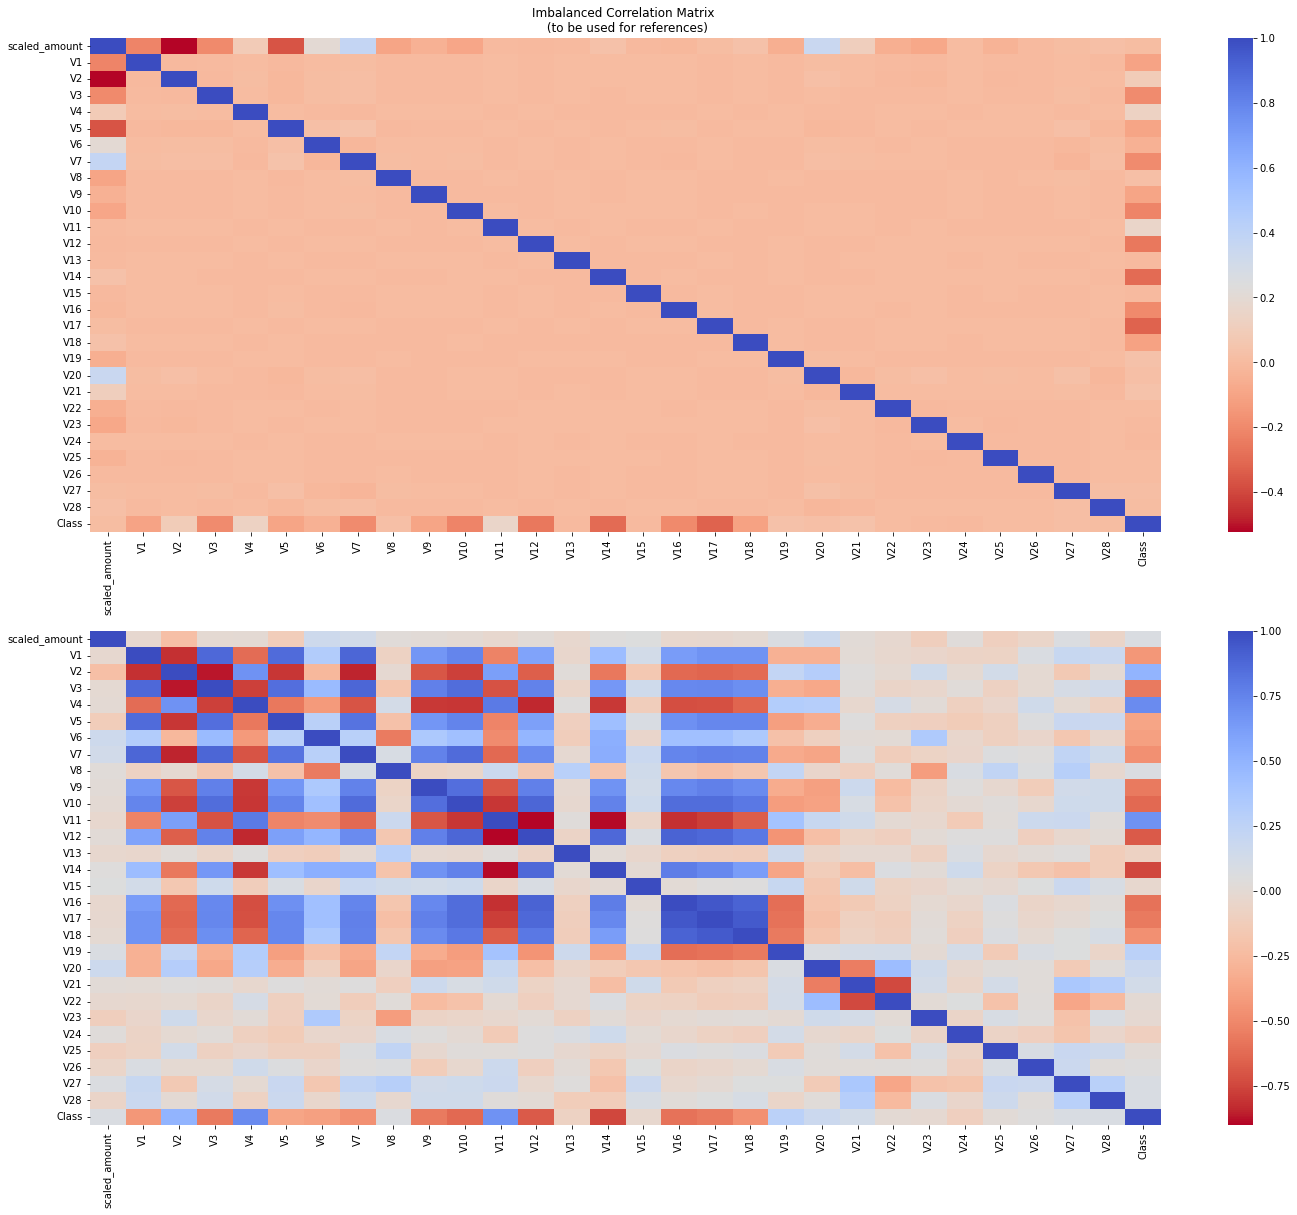

In [35]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(24,20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r',annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (not to be used for references)")

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r',annot_kws={'size':20}, ax=ax2)
ax1.set_title("Imbalanced Correlation Matrix \n (to be used for references)")

## Detecting outliers

In [36]:
corr = new_df.corr()
corr[['Class']]
corr[corr.Class<-0.6]['Class']

V10   -0.628384
V12   -0.682628
V14   -0.746510
Name: Class, dtype: float64

In [37]:
corr[corr.Class>0.5]['Class']

V4       0.716418
V11      0.685666
Class    1.000000
Name: Class, dtype: float64

V4 and V11 are highly positively correlated and V10, V12, V14 have highly negative correlation with class.

Text(0.5, 1.0, 'V10 vs Class Negative Correlation')

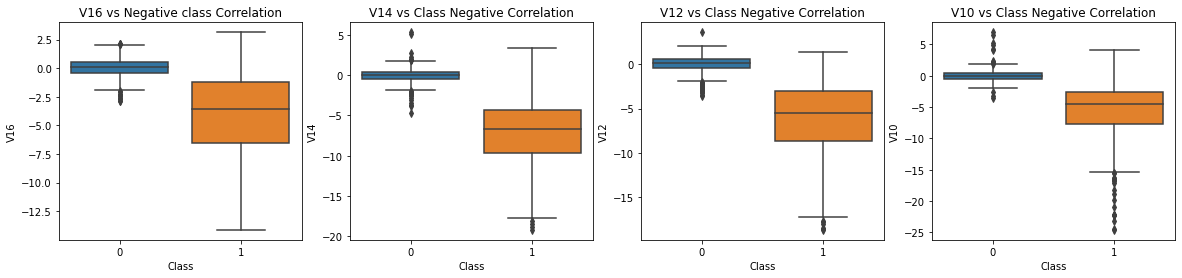

In [38]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x='Class',y='V16', data = new_df, ax = axes[0])
axes[0].set_title('V16 vs Negative class Correlation')

sns.boxplot(x='Class',y='V14',data=new_df,ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V12',data=new_df,ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class',y='V10',data=new_df,ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

Text(0.5, 1.0, 'V4 vs Class')

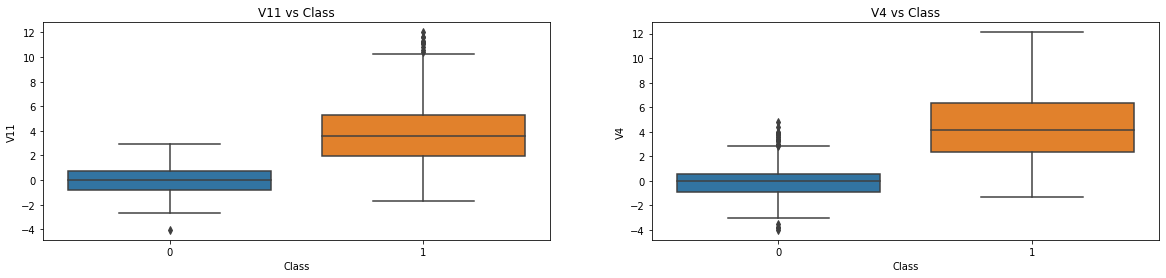

In [39]:
f, axes = plt.subplots(ncols = 2, figsize=(20,4))

sns.boxplot(x='Class',y='V11', data=new_df, ax=axes[0])
axes[0].set_title("V11 vs Class")

sns.boxplot(x='Class',y='V4',data=new_df,ax=axes[1])
axes[1].set_title("V4 vs Class")

<AxesSubplot:ylabel='Density'>

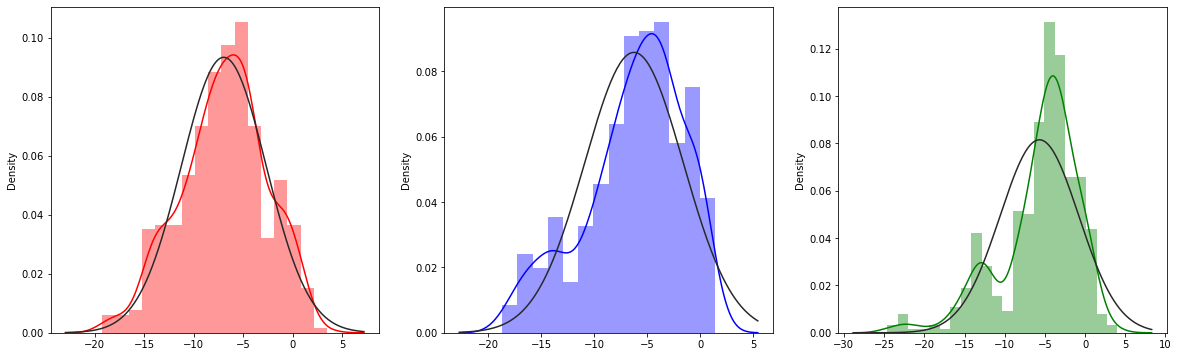

In [40]:
from scipy.stats import norm

f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,6))

V14_fraud_dist = new_df['V14'].loc[new_df['Class']==1].values
sns.distplot(V14_fraud_dist,ax=ax1,kde=True,fit=norm, color='red')

V12_fraud_dist = new_df['V12'].loc[new_df['Class']==1].values
sns.distplot(V12_fraud_dist, ax=ax2, fit=norm, color='blue')

V10_fraud_dist = new_df['V10'].loc[new_df['Class']==1].values
sns.distplot(V10_fraud_dist, ax=ax3, fit=norm, color='green')


In [41]:
len(V12_fraud_dist)

492

## Removing Outliers (using IQR)

In [42]:
V14_fraud = new_df['V14'].loc[new_df['Class']==1].values
q25, q75 = np.percentile(V14_fraud,25), np.percentile(V14_fraud,75)
print("Quartile  25 : {} | Quartile 75 : {}".format(q25,q75))

V14_iqr = q75-q25
print('iqr: {}'.format(V14_iqr))
V14_cut_off = V14_iqr*1.5
V14_lower, V14_upper = q25 - V14_cut_off, q75 + V14_cut_off
print("Cut off: {}".format(V14_cut_off))
print("V14 upper: {}".format(V14_upper))
print("V14 lower: {}".format(V14_lower))

outliers = [x for x in V14_fraud if x<V14_lower or x>V14_upper]
print("Feature V14 Outliers for fraud cases: {}".format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V14']>V14_upper) | (new_df['V14']<V14_lower)].index)
print('----' * 44)
###################################################################################################################

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

##################################################################################################################

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile  25 : -9.692722964972386 | Quartile 75 : -4.282820849486865
iqr: 5.409902115485521
Cut off: 8.114853173228282
V14 upper: 3.8320323237414167
V14 lower: -17.807576138200666
Feature V14 Outliers for fraud cases: 4
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.0475965708216, -18.6837146333443, -18.4311310279993, -18.5536970096458]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 974
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.2556117491401, -24.4031849699728, -23.2282548357516, -18.2711681738888, -15.3460988468775, -17.1415136412892, -2

Text(0, -12, 'Fewer extreme \n outliers')

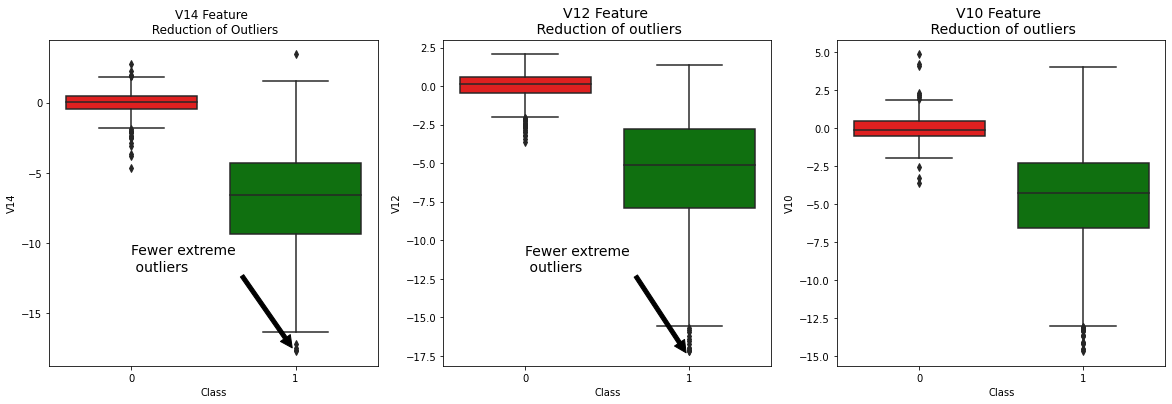

In [43]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,6))

colors = ['red','green']
 
#feature V14
sns.boxplot(x='Class',y='V14', data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of Outliers")
ax1.annotate('Fewer extreme \n outliers', xy=(0.98,-17.5),xytext=(0,-12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature v12
sns.boxplot(x='Class',y='V12',data=new_df,ax=ax2,palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

#feature V10
sns.boxplot(x='Class',y='V10',data=new_df,ax=ax3,palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),arrowprops=dict(facecolor='black'),fontsize=14)

## Dimensionality reduction and visualisation

In [44]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

X = new_df.drop('Class',axis=1)
y = new_df['Class']

#TSNE implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)                      
t1 = time.time()
print("T-SNE took {:.2} s".format(t1-t0))

#PCA implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)                       
t1 = time.time()
print("PCA took {:.2} s".format(t1-t0))

#TruncatedSVD implementation
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, random_state=42).fit_transform(X.values)                     
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1-t0))

T-SNE took 1e+01 s
PCA took 0.11 s
Truncated SVD took 0.01 s


In [45]:
#plotting

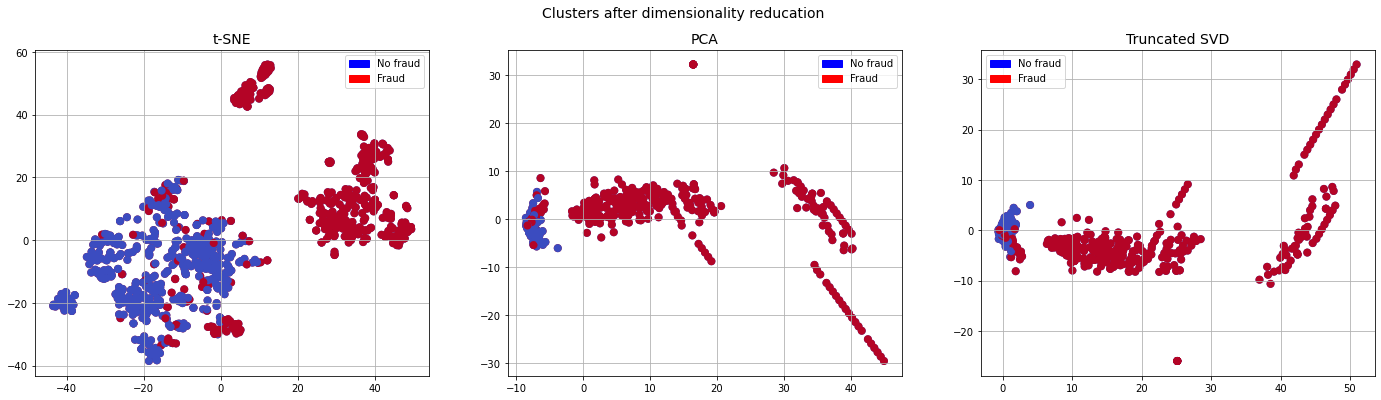

In [46]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(24,6))
f.suptitle('Clusters after dimensionality reducation',fontsize=14)

blue_patch = mpatches.Patch(color='blue',label = 'No fraud')
red_patch = mpatches.Patch(color='red',label='Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])

## Implementing Models

In [47]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train = X_train.values

In [49]:
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [50]:
print('X_shapes : \n','X_train:', 'X_test: ', X_train.shape, X_test.shape,'\n')
print('y_shapes : \n','y_train:', 'y_test: ', y_train.shape, y_test.shape,'\n')

X_shapes : 
 X_train: X_test:  (755, 29) (189, 29) 

y_shapes : 
 y_train: y_test:  (755,) (189,) 



* Logistic Regression
* KNeighbourClassifier
* Support Vector Classifier
* Decision Tree Classifier

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [52]:
Models = {"LogisticRegression": LogisticRegression(),
         "KNearest": KNeighborsClassifier(),
         "Support Vector Machine": SVC(),
         "DecisionTreeClassifier": DecisionTreeClassifier()}

In [53]:
from sklearn.model_selection import cross_val_score

for key, classifier in Models.items():
    classifier.fit(X_train,y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifier: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifier:  LogisticRegression has a training score of 93.0 % accuracy score
Classifier:  KNeighborsClassifier has a training score of 93.0 % accuracy score
Classifier:  SVC has a training score of 93.0 % accuracy score
Classifier:  DecisionTreeClassifier has a training score of 88.0 % accuracy score


#Logistic Regression and SVM are working best.

Hyperparameter search using *Gridsearch*

In [54]:
from sklearn.model_selection import GridSearchCV


#logistic Regression
log_reg_params = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}
grid_log_reg = GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train,y_train)
log_reg = grid_log_reg.best_estimator_



#KNN
knears_params = {'n_neighbors': list(range(2,5,1)), 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train,y_train)
knears_neighbors = grid_knears.best_estimator_

#SVM
svc_params = {'C':[0.5,0.7,0.9,1],'kernel':['rbf','poly','sigmoid','linear']}
grid_svc = GridSearchCV(SVC(),svc_params)
grid_svc.fit(X_train,y_train)
svc = grid_svc.best_estimator_

#DecisionTree Classifier
tree_params = {"criterion":['gini','entropy'],'max_depth': list(range(2,4,1)),'min_samples_leaf':list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(),tree_params)
grid_tree.fit(X_train,y_train)
tree_clf = grid_tree.best_estimator_


In [55]:
print(log_reg,"\n",knears_neighbors,"\n",svc,'\n',tree_clf)

LogisticRegression(C=0.1) 
 KNeighborsClassifier(n_neighbors=4) 
 SVC(C=0.5, kernel='linear') 
 DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)


In [56]:
log_reg_score = cross_val_score(log_reg,X_train,y_train,cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean()* 100, 2).astype(str) + '%')

knears_score = cross_val_score(knears_neighbors,X_train,y_train,cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')
                                                            
svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')
                                                            
tree_score = cross_val_score(tree_clf,X_train,y_train,cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')                                                          

Logistic Regression Cross Validation Score:  93.64%
Knears Neighbors Cross Validation Score 92.58%
Support Vector Classifier Cross Validation Score 92.98%
DecisionTree Classifier Cross Validation Score 92.32%


**Logistic Regression** has the best cross validation score.

## Plotting ROC curve

In [57]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

log_reg_pred = log_reg.predict(X_test)

knears_pred = knears_neighbors.predict(X_test)

svc_pred = svc.predict(X_test)

tree_pred = tree_clf.predict(X_test)

In [58]:
from sklearn.metrics import roc_auc_score

print("Logistic Regression : ",roc_auc_score(y_test,log_reg_pred))
print("Knears Neighbors: ", roc_auc_score(y_test,knears_pred))
print("Support Vector Machine: ",roc_auc_score(y_test,svc_pred))
print("Decision Tree Classifier:",roc_auc_score(y_test,tree_pred))

Logistic Regression :  0.9459093982420553
Knears Neighbors:  0.9401622718052738
Support Vector Machine:  0.9303583502366464
Decision Tree Classifier: 0.9352603110209601


In [59]:
 roc_curve(y_test, log_reg_pred)

(array([0.        , 0.03921569, 1.        ]),
 array([0.        , 0.93103448, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [60]:
log_fpr, log_tpr, log_thresold = roc_curve(y_test, log_reg_pred)
knear_fpr, knears_tpr, knear_threshold = roc_curve(y_test,knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test,svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test,tree_pred)

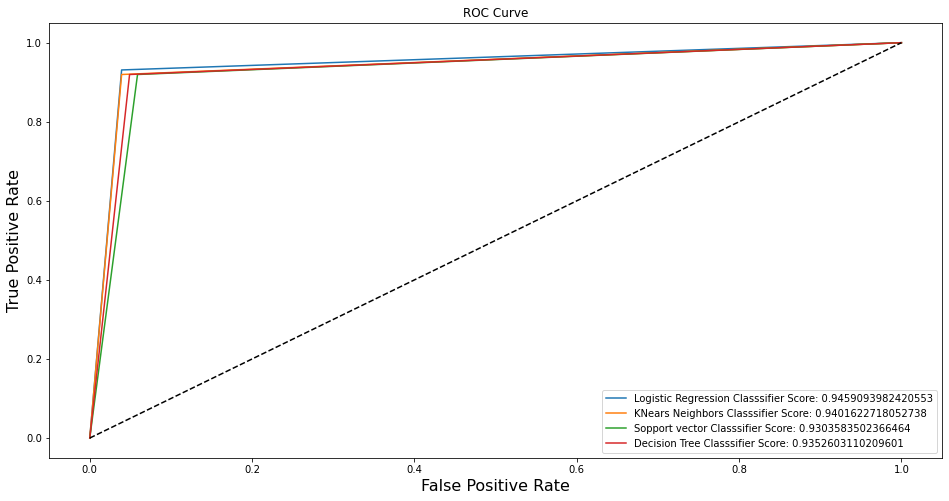

In [61]:
plt.figure(figsize = (16,8))
plt.title('ROC Curve')
plt.plot(log_fpr, log_tpr, label='Logistic Regression Classsifier Score: {}'.format(roc_auc_score(y_test,log_reg_pred)) )


plt.plot(knear_fpr, knears_tpr, label='KNears Neighbors Classsifier Score: {}'.format(roc_auc_score(y_test,knears_pred)) )
        

plt.plot(svc_fpr, svc_tpr, label='Sopport vector Classsifier Score: {}'.format(roc_auc_score(y_test,svc_pred)) )


plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classsifier Score: {}'.format(roc_auc_score(y_test,tree_pred) ))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend()

## Confusion matrices

Text(0.5, 1.0, 'confusion matrix for Decision Tree')

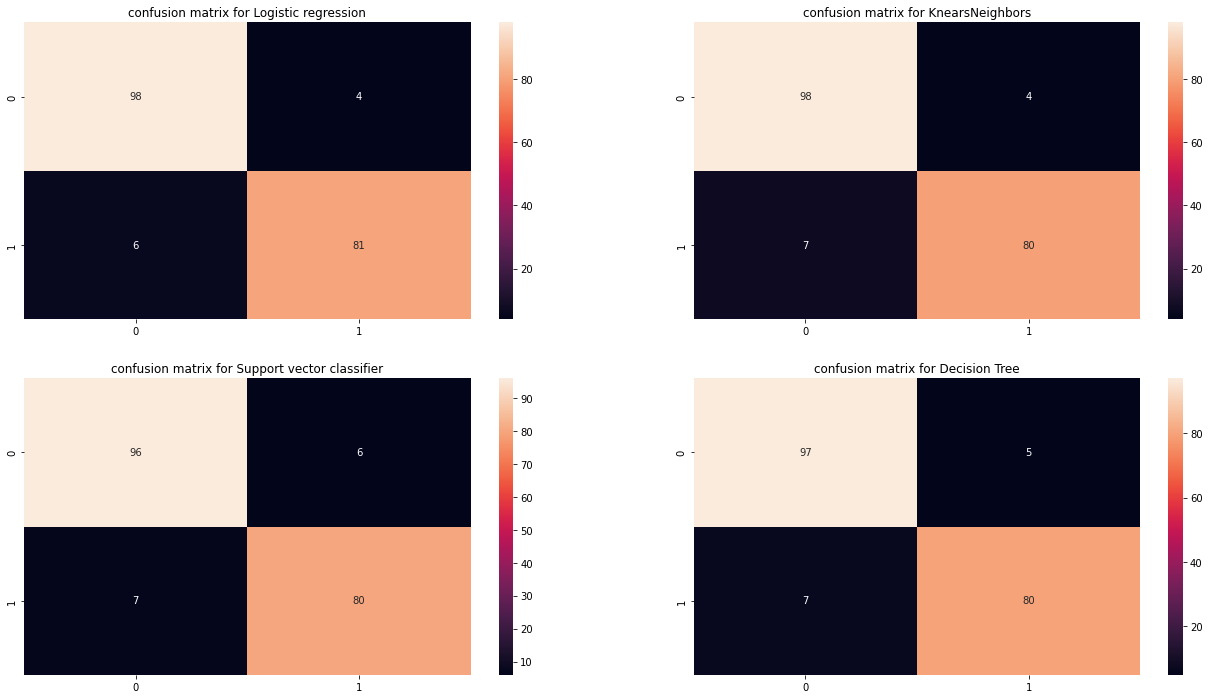

In [62]:
from sklearn.metrics import confusion_matrix

y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf = confusion_matrix(y_test,y_pred_log_reg)
knear_cf = confusion_matrix(y_test,y_pred_knear)
svc_cf = confusion_matrix(y_test,y_pred_svc)
tree_clf_cf = confusion_matrix(y_test,y_pred_tree)



fig, ax = plt.subplots(2,2, figsize=(22,12))

sns.heatmap(log_reg_cf,ax = ax[0][0], annot = True)
ax[0][0].set_title('confusion matrix for Logistic regression')


sns.heatmap(knear_cf,ax = ax[0][1], annot = True)
ax[0][1].set_title('confusion matrix for KnearsNeighbors')


sns.heatmap(svc_cf,ax = ax[1][0], annot = True)
ax[1][0].set_title('confusion matrix for Support vector classifier')


sns.heatmap(tree_clf_cf,ax = ax[1][1], annot = True)
ax[1][1].set_title('confusion matrix for Decision Tree')



In [63]:
from sklearn.metrics import classification_report

print('Logistic Regression : ')
print(classification_report(y_test,y_pred_log_reg))

print("KNears Neighbors : ")
print(classification_report(y_test,y_pred_knear))

print("Support vector Classifier : ")
print(classification_report(y_test,y_pred_svc))

print("Decision Tree : ")
print(classification_report(y_test,y_pred_tree))





Logistic Regression : 
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       102
           1       0.95      0.93      0.94        87

    accuracy                           0.95       189
   macro avg       0.95      0.95      0.95       189
weighted avg       0.95      0.95      0.95       189

KNears Neighbors : 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       102
           1       0.95      0.92      0.94        87

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted avg       0.94      0.94      0.94       189

Support vector Classifier : 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       102
           1       0.93      0.92      0.92        87

    accuracy                           0.93       189
   macro avg       0.93      0.93      0.93       189
we

* Logistic Regression outperforms others

In [64]:
#As we have a heavily imbalanced class and true negative are high(non-fraud), we use PR curve

In [65]:
import sklearn.metrics 
lr_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_log_reg)
lr_auprc

0.9189671270807173

In [66]:
svc_auprc = sklearn.metrics.average_precision_score(y_test,y_pred_svc)
svc_auprc

0.8924232973952301

In [67]:
#logistic Regression has the best auprc 

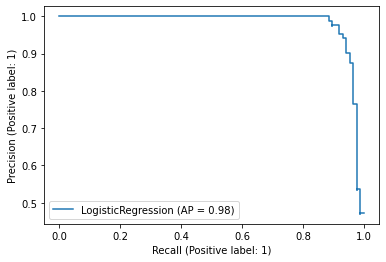

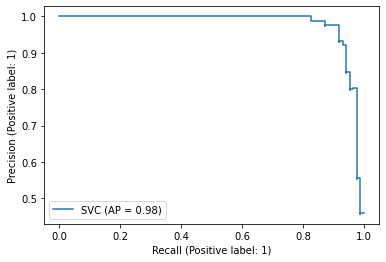

In [68]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
plot_precision_recall_curve(log_reg, X_test, y_test)
plot_precision_recall_curve(svc,X_test,y_test)

## Testing

In [69]:
org_log_reg_pred = log_reg.predict(original_Xtest)

org_knears_pred = knears_neighbors.predict(original_Xtest)

org_svc_pred = svc.predict(original_Xtest)

org_tree_pred = tree_clf.predict(original_Xtest)

* plotting confusion matrix for each

In [70]:
org_log_reg_cf = confusion_matrix(original_ytest,org_log_reg_pred)
org_knears_cf = confusion_matrix(original_ytest,org_knears_pred)
org_svc_cf = confusion_matrix(original_ytest,org_svc_pred)
org_tree_cf = confusion_matrix(original_ytest,org_tree_pred)

print(org_log_reg_cf,"\n",org_knears_cf,"\n",org_svc_cf,"\n",org_tree_cf)

[[55329  1532]
 [   11    87]] 
 [[56138   723]
 [   14    84]] 
 [[55157  1704]
 [    9    89]] 
 [[54151  2710]
 [   12    86]]


In [71]:
################check again too many True negatives

In [72]:
print("Logistic Regression : ")
print(classification_report(original_ytest,org_log_reg_pred))

print('KNears Neighbors:')
print(classification_report(original_ytest, org_knears_pred))

print('Support Vector Classifier:')
print(classification_report(original_ytest, org_svc_pred))

print('Tree Classifier:')
print(classification_report(original_ytest, org_tree_pred))

Logistic Regression : 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.05      0.89      0.10        98

    accuracy                           0.97     56959
   macro avg       0.53      0.93      0.54     56959
weighted avg       1.00      0.97      0.98     56959

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56861
           1       0.10      0.86      0.19        98

    accuracy                           0.99     56959
   macro avg       0.55      0.92      0.59     56959
weighted avg       1.00      0.99      0.99     56959

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56861
           1       0.05      0.91      0.09        98

    accuracy                           0.97     56959
   macro avg       0.52      0.94      0.54     56959
weight

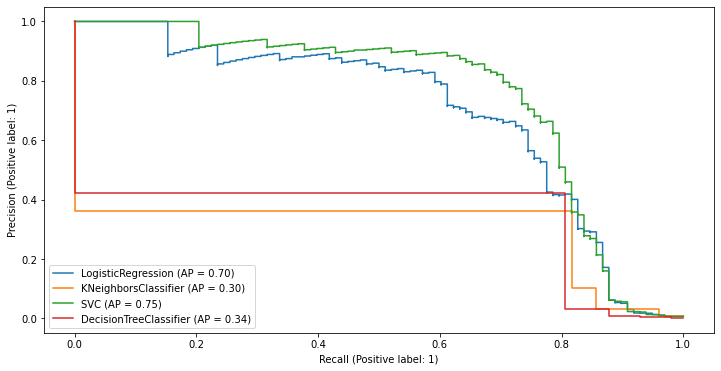

In [73]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plot_precision_recall_curve(log_reg, original_Xtest, original_ytest, ax=ax)
plot_precision_recall_curve(knears_neighbors, original_Xtest, original_ytest, ax=ax)
plot_precision_recall_curve(svc, original_Xtest, original_ytest, ax=ax)
plot_precision_recall_curve(tree_clf, original_Xtest, original_ytest, ax=ax)
plt.legend()

In [74]:
org_lr_auprc = sklearn.metrics.average_precision_score(original_ytest, org_log_reg_pred)
org_lr_auprc

0.04789830597427148